<a href="https://colab.research.google.com/github/ShubhMody/Stock-Price-Prediction-using-L2-Regression-and-LSTM/blob/main/Stock_Price_Predictions_Using_Ridge_Linear_Regression_%26_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1: IMPORTING DATASETS AND LIBRARIES


In [64]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras


In [66]:
# Reading stock prices data
stock_price_df = pd.read_csv('/content/drive/My Drive/Machine Learning Projects - Financial Analysis/AI and ML in Finance/Stock Price Prediction/stock.csv')
stock_price_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [67]:
# Reading the stocks volume data
stock_vol_df = pd.read_csv("/content/drive/My Drive/Machine Learning Projects - Financial Analysis/AI and ML in Finance/Stock Price Prediction/stock_volume.csv")
stock_vol_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,53146800,3934500,26511100,17891100,5385800,6881000,729300,3764400,4019890000
1,2012-01-13,56505400,4641100,22096800,16621800,4753500,5279200,5500400,4631800,3692370000
2,2012-01-17,60724300,3700100,23500200,15480800,5644500,6003400,4651600,3832800,4010490000
3,2012-01-18,69197800,4189500,22015000,18387600,7473500,4600600,1260200,5544000,4096160000
4,2012-01-19,65434600,5397300,25524000,14022900,7096000,8567200,1246300,12657800,4465890000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,30498000,46551000,22991700,18914200,3930000,3675400,4978000,1979500,4732220000
2155,2020-08-06,50607200,32921600,21908700,35867700,3940600,3417100,5992300,1995400,4267490000
2156,2020-08-07,49453300,19301600,30398500,34530300,3929600,3651000,8883500,1576600,4104860000
2157,2020-08-10,53100900,35857700,35514400,71219700,3167300,3968300,7522300,1289300,4318570000


In [68]:
# Sorting the data based on Date
stock_price_df = stock_price_df.sort_values(by = ['Date'])
stock_price_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [69]:
# Sorting the data based on Date
stock_vol_df = stock_vol_df.sort_values(by = ['Date'])
stock_vol_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,53146800,3934500,26511100,17891100,5385800,6881000,729300,3764400,4019890000
1,2012-01-13,56505400,4641100,22096800,16621800,4753500,5279200,5500400,4631800,3692370000
2,2012-01-17,60724300,3700100,23500200,15480800,5644500,6003400,4651600,3832800,4010490000
3,2012-01-18,69197800,4189500,22015000,18387600,7473500,4600600,1260200,5544000,4096160000
4,2012-01-19,65434600,5397300,25524000,14022900,7096000,8567200,1246300,12657800,4465890000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,30498000,46551000,22991700,18914200,3930000,3675400,4978000,1979500,4732220000
2155,2020-08-06,50607200,32921600,21908700,35867700,3940600,3417100,5992300,1995400,4267490000
2156,2020-08-07,49453300,19301600,30398500,34530300,3929600,3651000,8883500,1576600,4104860000
2157,2020-08-10,53100900,35857700,35514400,71219700,3167300,3968300,7522300,1289300,4318570000


In [70]:
# Checking if Null values exist in stock prices data
stock_price_df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [71]:
# Checking if Null values exist in stocks volume data
stock_vol_df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [72]:
# Obtaining stock prices dataframe info
stock_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 185.5+ KB


In [73]:
# Obtaining stock volume dataframe info
stock_vol_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2159 non-null   object
 1   AAPL    2159 non-null   int64 
 2   BA      2159 non-null   int64 
 3   T       2159 non-null   int64 
 4   MGM     2159 non-null   int64 
 5   AMZN    2159 non-null   int64 
 6   IBM     2159 non-null   int64 
 7   TSLA    2159 non-null   int64 
 8   GOOG    2159 non-null   int64 
 9   sp500   2159 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 185.5+ KB


In [74]:
stock_vol_df.describe()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
count,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03
mean,5.820332e+07,6.419916e+06,2.832131e+07,9.845582e+06,4.102673e+06,4.453090e+06,7.001302e+06,2.498238e+06,3.680732e+09
std,4.568141e+07,9.711873e+06,1.428911e+07,7.295753e+06,2.290722e+06,2.462811e+06,5.781208e+06,1.928407e+06,8.622717e+08
min,1.136200e+07,7.889000e+05,6.862400e+06,9.507000e+05,8.813000e+05,1.193000e+06,3.649000e+05,7.900000e+03,1.248960e+09
25%,2.769930e+07,3.031850e+06,2.002150e+07,5.796450e+06,2.675700e+06,3.111250e+06,3.433450e+06,1.325400e+06,3.211890e+09
50%,4.209420e+07,3.991000e+06,2.485930e+07,7.899800e+06,3.494800e+06,3.825000e+06,5.581100e+06,1.813900e+06,3.526890e+09
75%,7.182480e+07,5.325900e+06,3.210565e+07,1.104055e+07,4.768150e+06,4.937300e+06,8.619550e+06,3.245350e+06,3.933290e+09
max,3.765300e+08,1.032128e+08,1.950827e+08,9.009820e+07,2.385610e+07,3.049020e+07,6.093880e+07,2.497790e+07,9.044690e+09


#2: PERFORMING EXPLORATORY DATA ANALYSIS AND VISUALIZATION

In [75]:
# Function to normalize stock prices based on their initial price
def normalize(df):
  x = df.copy()
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

In [76]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [77]:
# plotting interactive chart for stocks data
interactive_plot(stock_price_df, 'Stock Prices')

#3: PREPARING THE DATA BEFORE TRAINING THE AI/ML MODEL

In [78]:
# Function to concatenate the date, stock price, and volume in one dataframe
def individual_stock(price_df, vol_df, name):
    return pd.DataFrame({'Date': price_df['Date'], 'Close': price_df[name], 'Volume': vol_df[name]})

In [79]:
# Function to return the input/output (target) data for AI/ML Model
def trading_window(data):

  # 1 day window
  n = 1

  # column containing the prices for the next day
  data['Target'] = data[['Close']].shift(-n)

  # return the new dataset
  return data

In [80]:
# Testing the functions and getting individual stock prices and volumes for AAPL
price_volume_df = individual_stock(stock_price_df, stock_vol_df, 'AAPL')
price_volume_df

,Date,Close,Volume
0,2012-01-12,60.198570,53146800
1,2012-01-13,59.972858,56505400
2,2012-01-17,60.671429,60724300
3,2012-01-18,61.301430,69197800
4,2012-01-19,61.107143,65434600
...,...,...,...
2154,2020-08-05,440.250000,30498000
2155,2020-08-06,455.609985,50607200
2156,2020-08-07,444.450012,49453300
2157,2020-08-10,450.910004,53100900


In [81]:
price_volume_target_df = trading_window(price_volume_df)
price_volume_target_df

,Date,Close,Volume,Target
0,2012-01-12,60.198570,53146800,59.972858
1,2012-01-13,59.972858,56505400,60.671429
2,2012-01-17,60.671429,60724300,61.301430
3,2012-01-18,61.301430,69197800,61.107143
4,2012-01-19,61.107143,65434600,60.042858
...,...,...,...,...
2154,2020-08-05,440.250000,30498000,455.609985
2155,2020-08-06,455.609985,50607200,444.450012
2156,2020-08-07,444.450012,49453300,450.910004
2157,2020-08-10,450.910004,53100900,437.500000


In [82]:
# Removing the last row as it will be a null value
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df

,Date,Close,Volume,Target
0,2012-01-12,60.198570,53146800,59.972858
1,2012-01-13,59.972858,56505400,60.671429
2,2012-01-17,60.671429,60724300,61.301430
3,2012-01-18,61.301430,69197800,61.107143
4,2012-01-19,61.107143,65434600,60.042858
...,...,...,...,...
2153,2020-08-04,438.660004,43267900,440.250000
2154,2020-08-05,440.250000,30498000,455.609985
2155,2020-08-06,455.609985,50607200,444.450012
2156,2020-08-07,444.450012,49453300,450.910004


In [83]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['Date']))

In [84]:
price_volume_target_scaled_df

array([[0.01102638, 0.11442624, 0.01046185],
       [0.01046185, 0.12362365, 0.01220906],
       [0.01220906, 0.13517696, 0.01378478],
       ...,
       [1.        , 0.10747163, 0.97208751],
       [0.97208751, 0.10431171, 0.98824476],
       [0.98824476, 0.11430054, 0.95470465]])

In [85]:
price_volume_target_scaled_df.shape

(2158, 3)

In [86]:
# Creating Feature and Target
X = price_volume_target_scaled_df[:,:-1]
y = price_volume_target_scaled_df[:,-1]

In [87]:
# Converting dataframe to arrays
# X = np.asarray(X)
# y = np.asarray(y)
X.shape, y.shape

((2158, 2), (2158,))

In [88]:
# Spliting the data this way since order is important in time-series
split = int(0.75 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [89]:
X_train.shape, y_train.shape

((1618, 2), (1618,))

In [90]:
X_test.shape, y_test.shape

((540, 2), (540,))

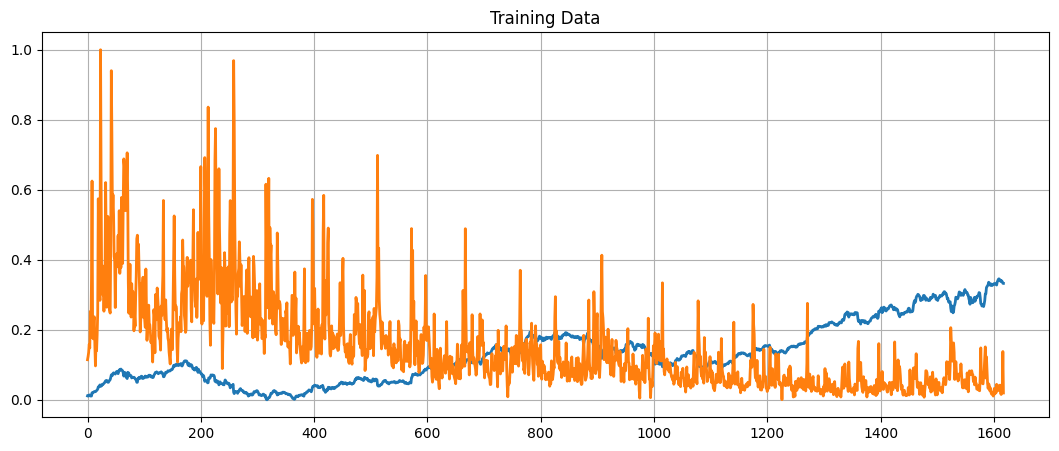

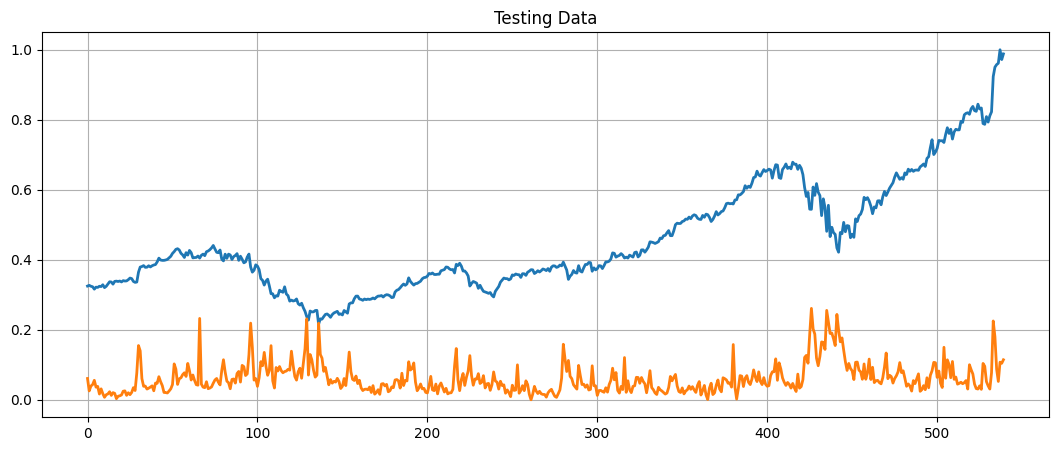

In [91]:
# A data plotting function
def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 2)
  plt.title(title)
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')


In [92]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#4: BUILDING AND TRAINING A RIDGE LINEAR REGRESSION MODEL

In [93]:
from sklearn.linear_model import Ridge
# Creating and training the Ridge Linear Regression  Model
regression_model = Ridge()
regression_model.fit(X_train, y_train)

Ridge()

In [94]:
# Testing the model and calculating its accuracy
lr_accuracy = regression_model.score(X_test, y_test)
print("Linear Regression Score: ", lr_accuracy)

Linear Regression Score:  0.9311227075637692


In [95]:
# Making Prediction
predicted_prices = regression_model.predict(X)
predicted_prices

array([0.02628595, 0.02542773, 0.02652743, ..., 0.90335343, 0.87872987,
       0.89266596])

In [96]:
# Appending the predicted values into a list
Predicted = []
for i in predicted_prices:
  Predicted.append(i)

In [97]:
len(Predicted)

2158

In [98]:
# Appending the close values to the list
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])


In [99]:
# Creating a dataframe based on the dates in the individual stock data
df_predicted = price_volume_target_df[['Date']]
df_predicted

,Date
0,2012-01-12
1,2012-01-13
2,2012-01-17
3,2012-01-18
4,2012-01-19
...,...
2153,2020-08-04
2154,2020-08-05
2155,2020-08-06
2156,2020-08-07


In [100]:
# Adding the close values to the dataframe
df_predicted['Close'] = close
df_predicted

,Date,Close
0,2012-01-12,0.011026
1,2012-01-13,0.010462
2,2012-01-17,0.012209
3,2012-01-18,0.013785
4,2012-01-19,0.013299
...,...,...
2153,2020-08-04,0.957606
2154,2020-08-05,0.961583
2155,2020-08-06,1.000000
2156,2020-08-07,0.972088


In [101]:
# Adding the predicted values to the dataframe
df_predicted['Prediction'] = Predicted
df_predicted

,Date,Close,Prediction
0,2012-01-12,0.011026,0.026286
1,2012-01-13,0.010462,0.025428
2,2012-01-17,0.012209,0.026527
3,2012-01-18,0.013785,0.027022
4,2012-01-19,0.013299,0.026992
...,...,...,...
2153,2020-08-04,0.957606,0.866550
2154,2020-08-05,0.961583,0.871436
2155,2020-08-06,1.000000,0.903353
2156,2020-08-07,0.972088,0.878730


In [102]:
# Plotting the results
interactive_plot(df_predicted, "Original Vs. Prediction")

In [103]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(df_predicted['Close'], df_predicted['Prediction'])
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 0.020021


#5: TRAINING AN LSTM TIME SERIES MODEL

In [104]:
# Testing the functions and getting individual stock prices and volumes for S&P500
price_volume_df = individual_stock(stock_price_df, stock_vol_df, 'sp500')
price_volume_df

,Date,Close,Volume
0,2012-01-12,1295.500000,4019890000
1,2012-01-13,1289.089966,3692370000
2,2012-01-17,1293.670044,4010490000
3,2012-01-18,1308.040039,4096160000
4,2012-01-19,1314.500000,4465890000
...,...,...,...
2154,2020-08-05,3327.770020,4732220000
2155,2020-08-06,3349.159912,4267490000
2156,2020-08-07,3351.280029,4104860000
2157,2020-08-10,3360.469971,4318570000


In [105]:
# Getting the close and volume data as training data (Input)
training_data = price_volume_df.iloc[:, 1:3].values
training_data

array([[1.29550000e+03, 4.01989000e+09],
       [1.28908997e+03, 3.69237000e+09],
       [1.29367004e+03, 4.01049000e+09],
       ...,
       [3.35128003e+03, 4.10486000e+09],
       [3.36046997e+03, 4.31857000e+09],
       [3.33368994e+03, 5.08765000e+09]])

In [106]:
# Normalizing the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)

In [107]:
# Creating the training and testing data, training data contains present day and previous day values
X = []
y = []
for i in range(1, len(price_volume_df)):
    X.append(training_set_scaled [i-1:i, 0])
    y.append(training_set_scaled [i, 0])

In [108]:
# Converting the data into array format
X = np.asarray(X)
y = np.asarray(y)

In [109]:
# Splitting the data
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [110]:
# Reshaping the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((1510, 1, 1), (648, 1, 1))

In [111]:
# Creating the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm_3 (LSTM)               (None, 1, 150)            91200     
                                                                 
 dropout_2 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_4 (LSTM)               (None, 1, 150)            180600    
                                                                 
 dropout_3 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_5 (LSTM)               (None, 150)               180600    
                                                                 
 dense_1 (Dense)             (None, 1)                 151 

In [112]:
# Training the model
history = model.fit(
    X_train, y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/20
38/38 [==============================] - 9s 56ms/step - loss: 0.0309 - val_loss: 0.0674
Epoch 2/20
38/38 [==============================] - 1s 18ms/step - loss: 0.0068 - val_loss: 0.0032
Epoch 3/20
38/38 [==============================] - 1s 17ms/step - loss: 5.8699e-04 - val_loss: 1.7838e-04
Epoch 4/20
38/38 [==============================] - 1s 18ms/step - loss: 3.4705e-04 - val_loss: 2.2633e-04
Epoch 5/20
38/38 [==============================] - 1s 17ms/step - loss: 3.8585e-04 - val_loss: 6.2157e-05
Epoch 6/20
38/38 [==============================] - 1s 17ms/step - loss: 3.0019e-04 - val_loss: 5.2153e-05
Epoch 7/20
38/38 [==============================] - 1s 18ms/step - loss: 3.1830e-04 - val_loss: 8.6282e-05
Epoch 8/20
38/38 [==============================] - 1s 17ms/step - loss: 3.1063e-04 - val_loss: 3.4263e-05
Epoch 9/20
38/38 [==============================] - 1s 17ms/step - loss: 2.8249e-04 - val_loss: 3.7893e-05
Epoch 10/20
38/38 [==============================] - 

In [113]:
# Making prediction
predicted = model.predict(X)
predicted

68/68 [==============================] - 1s 4ms/step


array([[0.00792008],
       [0.00481843],
       [0.00703461],
       ...,
       [0.96270794],
       [0.9636169 ],
       [0.9675538 ]], dtype=float32)

In [114]:
# Appending the predicted values to the list
test_predicted = []

for i in predicted:
  test_predicted.append(i[0])

In [115]:
test_predicted[0]

0.007920079

In [116]:
df_predicted = price_volume_df[1:][['Date']]
df_predicted

,Date
1,2012-01-13
2,2012-01-17
3,2012-01-18
4,2012-01-19
5,2012-01-20
...,...
2154,2020-08-05
2155,2020-08-06
2156,2020-08-07
2157,2020-08-10


In [117]:
df_predicted['predictions'] = test_predicted

In [118]:
df_predicted

,Date,predictions
1,2012-01-13,0.007920
2,2012-01-17,0.004818
3,2012-01-18,0.007035
4,2012-01-19,0.013988
5,2012-01-20,0.017113
...,...,...
2154,2020-08-05,0.944377
2155,2020-08-06,0.953526
2156,2020-08-07,0.962708
2157,2020-08-10,0.963617


In [119]:
# Plotting the data
close = []
for i in training_set_scaled:
  close.append(i[0])
close[0]

0.008282282297732424

In [120]:
df_predicted['Close'] = close[1:]

In [121]:
df_predicted

,Date,predictions,Close
1,2012-01-13,0.007920,0.005242
2,2012-01-17,0.004818,0.007414
3,2012-01-18,0.007035,0.014231
4,2012-01-19,0.013988,0.017295
5,2012-01-20,0.017113,0.017713
...,...,...,...
2154,2020-08-05,0.944377,0.972307
2155,2020-08-06,0.953526,0.982453
2156,2020-08-07,0.962708,0.983459
2157,2020-08-10,0.963617,0.987819


In [122]:
forecast_errors = [close[i]- test_predicted[i] for i in range(len(close)-1)]
bias = sum(forecast_errors) * 1.0/len(close)
print('Bias: %f' % bias)

Bias: -0.001005


In [123]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(close[1:], test_predicted)
print('MAE: %f' % mae)

MAE: 0.008100


In [124]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(df_predicted['Close'], df_predicted['predictions'])
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 0.013029


In [125]:
# Plotting the data
interactive_plot(df_predicted, "Original Vs Prediction")